In [451]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## LOAD DATASET

In [452]:
df = pd.read_csv("/content/abalone.csv")

In [453]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [454]:
df.shape

(4177, 9)

## RINGS = +1.5 GIVES THE AGE IN YEAR

In [455]:
df['Age'] = df['Rings']+1.5

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


##VISUALIZATION 

## UNI-VARIATE ANALYSIS

In [456]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


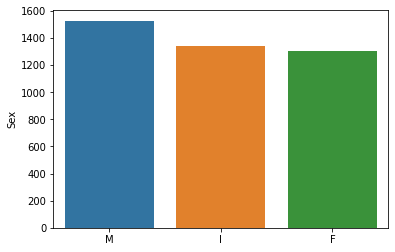

In [457]:
sns.barplot (df.Sex.value_counts().index , df.Sex.value_counts())

([<matplotlib.patches.Wedge at 0x7faa76e96dd0>,
 [Text(0.5319415728578049, 1.186186394739699, 'M'),
  Text(-1.0848393519507589, -0.18199884741134378, 'I'),
  Text(0.6099659291018239, -0.9153914820091724, 'F')],
 [Text(0.32734866022018755, 0.7299608583013532, '36.6%'),
  Text(-0.5917305556095048, -0.09927209858800569, '32.1%'),
  Text(0.3327086886009948, -0.49930444473227575, '31.3%')])

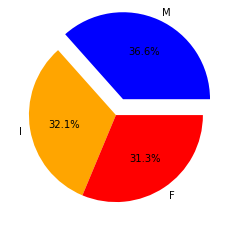

In [458]:
plt.pie(df.Sex.value_counts(),[0.2,0,0],labels=['M','I','F'],autopct="%1.1f%%",colors=['blue','orange','red'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


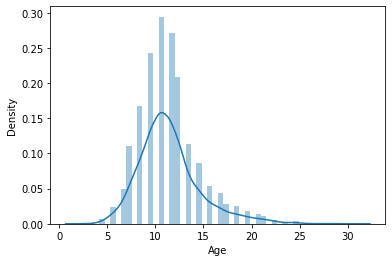

In [459]:
sns.distplot(df.Age)

## BI-VARIATE ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


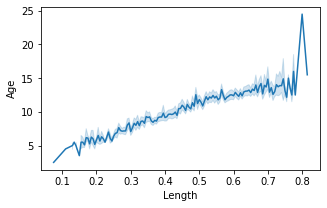

In [460]:
plt.figure(figsize=(5,3))
sns.lineplot(df.Length,df.Age)

## MULTI-VARIATE ANALYSIS

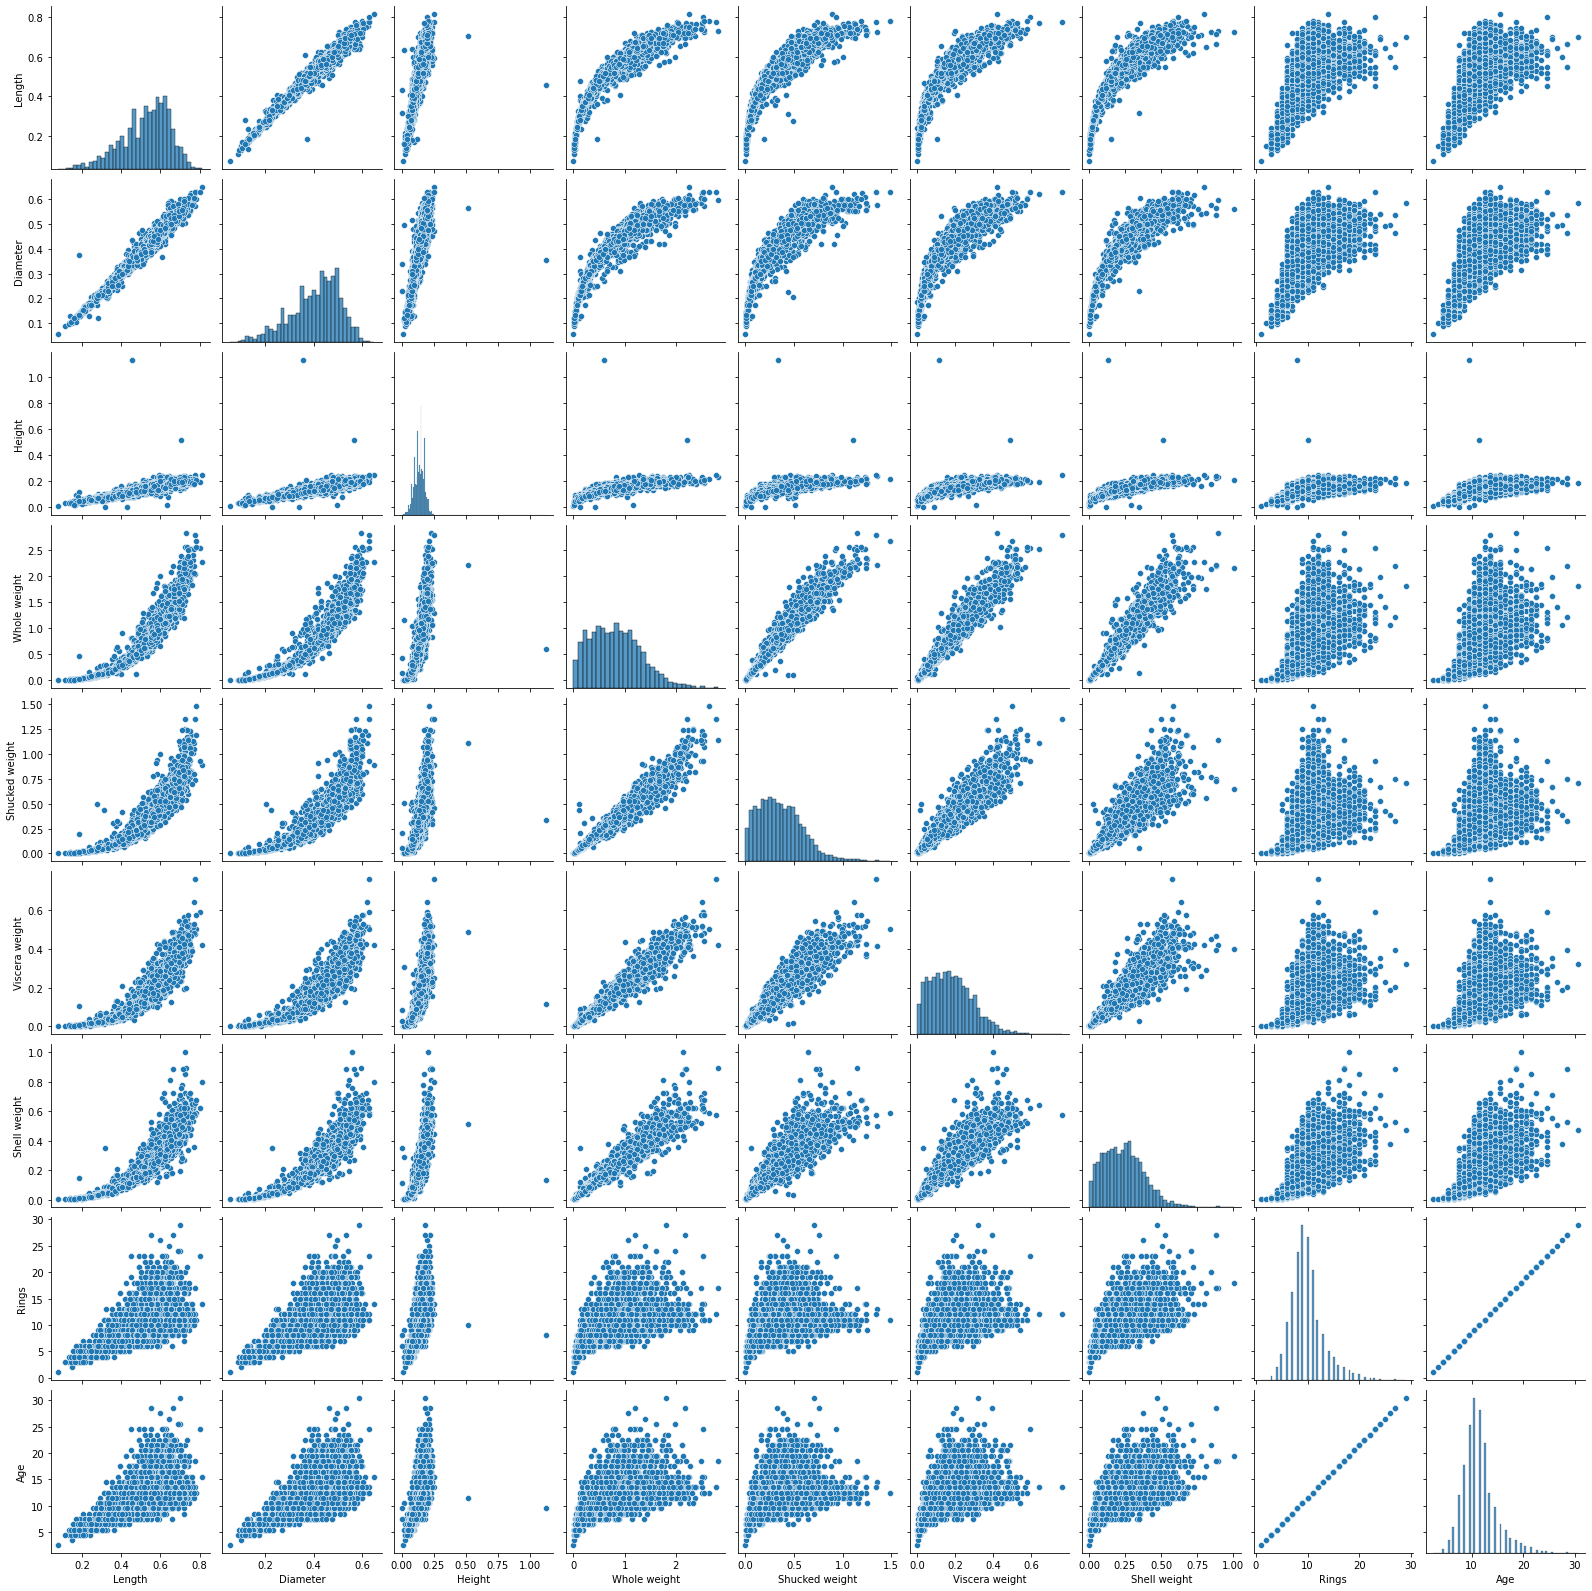

In [461]:
sns.pairplot(df)

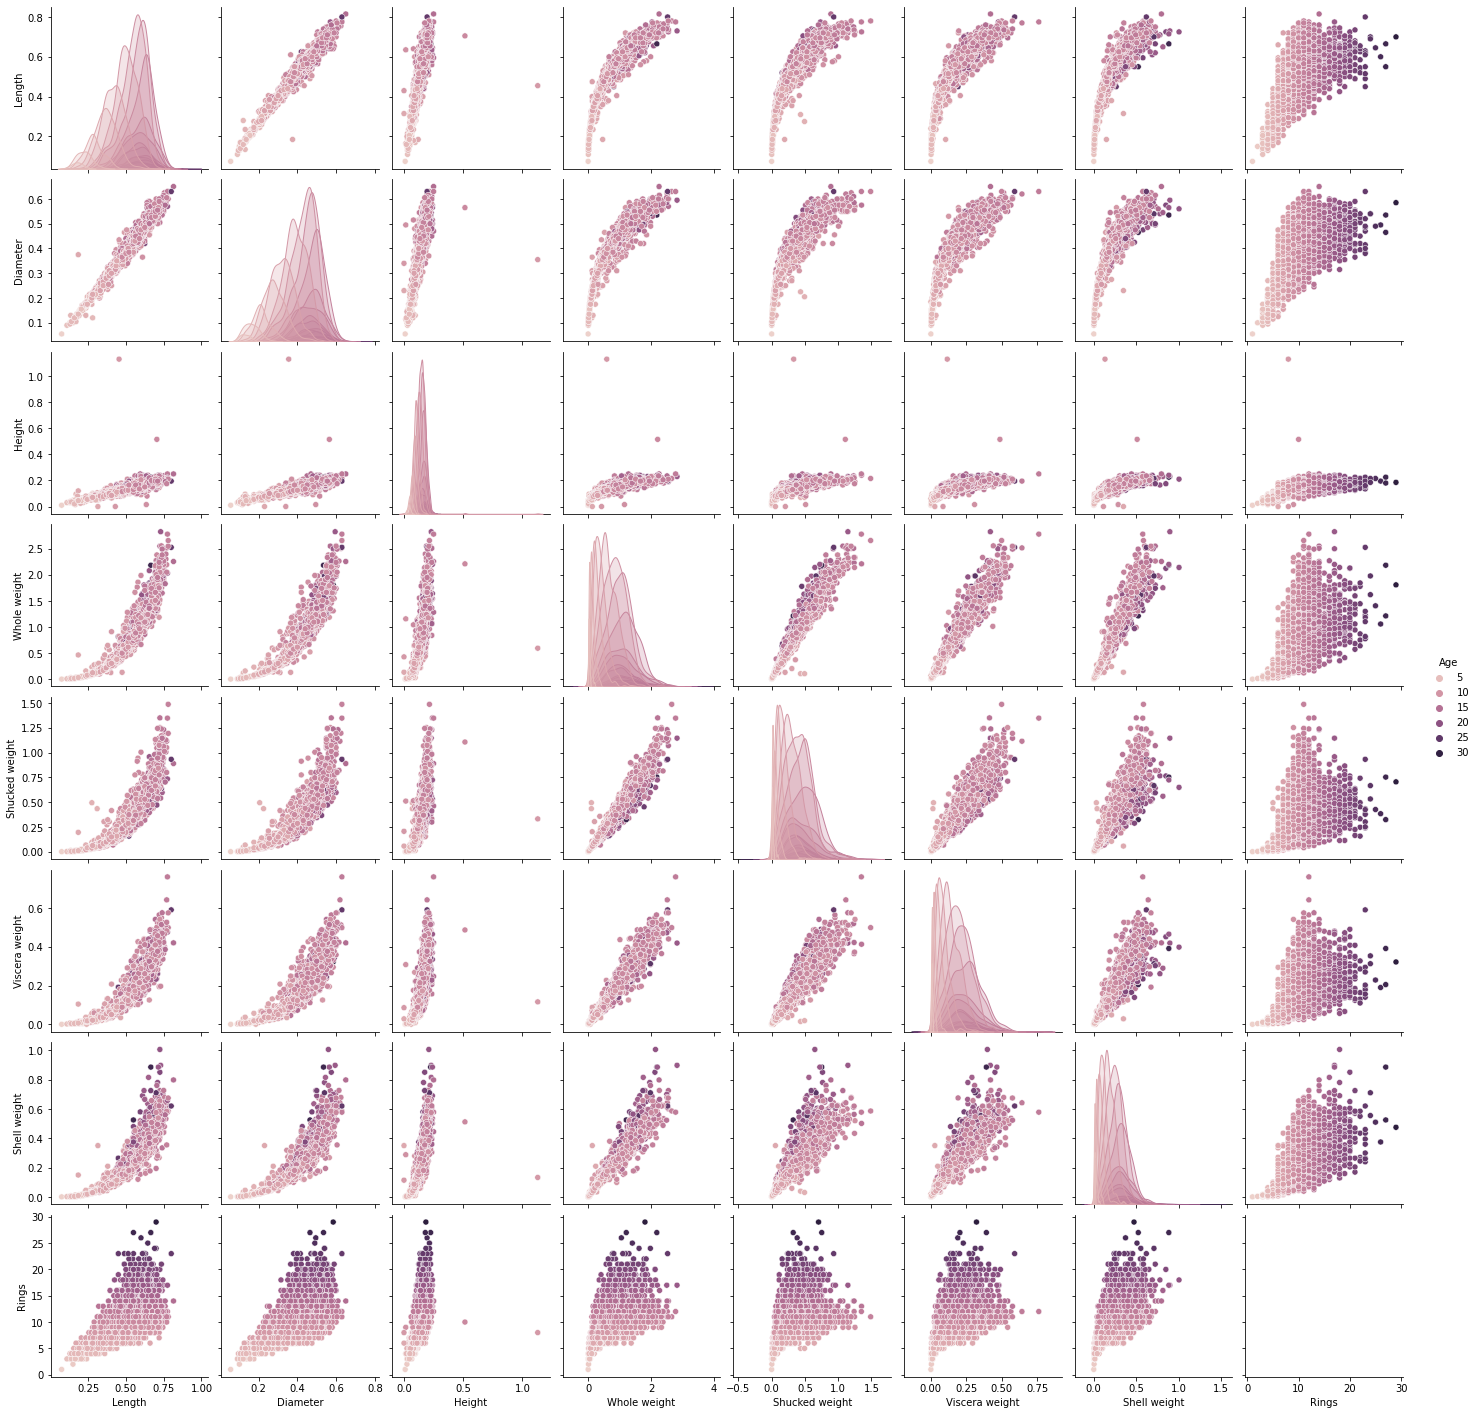

In [462]:
sns.pairplot(df,hue='Age',kind='scatter',diag_kind='kde')

## CHECKING MISSING VALUES

In [463]:
df.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
Age               False
dtype: bool

## DESCRIPTIVE STATISTICS 

In [464]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


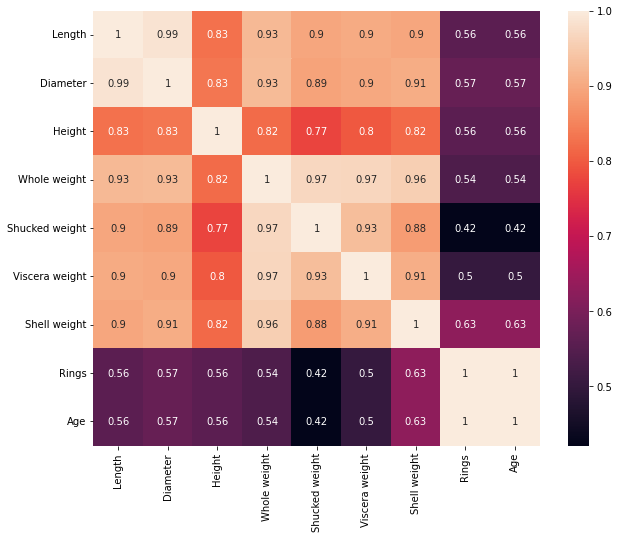

In [465]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

## REMOVING OUTLIERS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


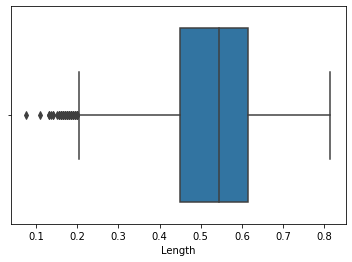

In [466]:
""" Heatmap we can clearly see that Height,Length and Diameter are Hightly correlated. 
And Weights are also Highly Correlated"""
sns.boxplot(df.Length)

In [467]:
df.Length.median()

0.545

In [468]:
q1=df.Length.quantile(0.25)
q3=df.Length.quantile(0.75)

In [469]:
IQR = q3-q1

In [470]:
upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

In [471]:
df=df[df.Length<upper_limit]
df=df[df.Length>lower_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


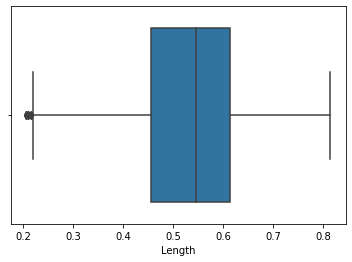

In [472]:
sns.boxplot(df.Length)

In [473]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


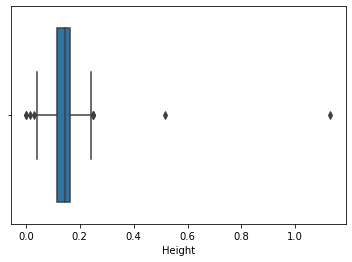

In [474]:
sns.boxplot(df.Height)

In [475]:
q1=df.Height.quantile(0.25)
q3=df.Height.quantile(0.75)
IQR = q3-q1
upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR
df=df[df.Height<upper_limit]
df=df[df.Height>lower_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


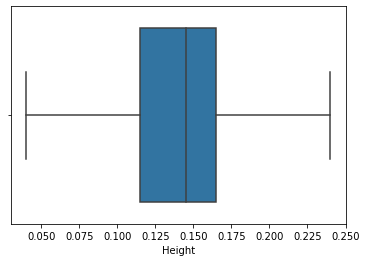

In [476]:
sns.boxplot(df.Height)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


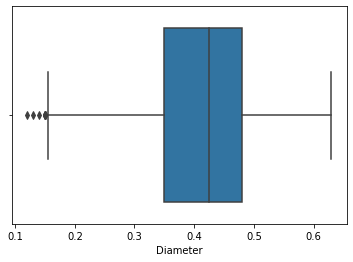

In [477]:
 sns.boxplot(df.Diameter)

In [478]:
q1=df.Diameter.quantile(0.25)
q3=df.Diameter.quantile(0.75)
IQR = q3-q1
upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR
df=df[df.Diameter<upper_limit]
df=df[df.Diameter>lower_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


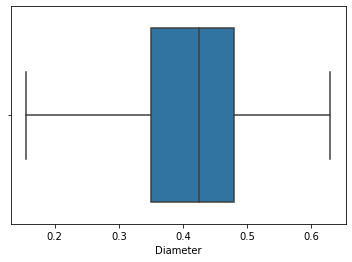

In [479]:
sns.boxplot(df.Diameter)

In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4108 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4108 non-null   object 
 1   Length          4108 non-null   float64
 2   Diameter        4108 non-null   float64
 3   Height          4108 non-null   float64
 4   Whole weight    4108 non-null   float64
 5   Shucked weight  4108 non-null   float64
 6   Viscera weight  4108 non-null   float64
 7   Shell weight    4108 non-null   float64
 8   Rings           4108 non-null   int64  
 9   Age             4108 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 353.0+ KB


##SPLITTING THE DATASET INTO X= INDEPENDENT VARIABLES AND Y = DEPENDENT VARIABLES

In [481]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [482]:
x = df.iloc[:,0:9]
y = df.iloc[:,9]

In [483]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [484]:
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4108, dtype: float64

In [485]:
x = pd.get_dummies(x)
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


## PERFORM ENCODING

In [486]:
from sklearn.preprocessing import LabelEncoder

In [487]:
le=LabelEncoder()

In [488]:
x.Sex_F=le.fit_transform(x.Sex_F)
x.Sex_I=le.fit_transform(x.Sex_I)
x.Sex_M=le.fit_transform(x.Sex_M)

In [489]:

x.head()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [490]:
y.head()

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

## SCALING

In [491]:
from sklearn.preprocessing import scale

In [492]:
x_scaled=pd.DataFrame(scale(x),columns=x.columns)
x_scaled.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,-0.653993,-0.499576,-1.245210,-0.674354,-0.637825,-0.759188,-0.670522,1.573098,-0.681563,-0.675824,1.306896
1,-1.582206,-1.565575,-1.381695,-1.272157,-1.209453,-1.245870,-1.254343,-0.954194,-0.681563,-0.675824,1.306896
2,0.009017,0.086723,-0.153330,-0.336600,-0.491488,-0.383748,-0.232657,-0.322371,1.467217,-0.675824,-0.765172
3,-0.786594,-0.499576,-0.426300,-0.670210,-0.678982,-0.638677,-0.634034,-0.006460,-0.681563,-0.675824,1.306896
4,-1.759008,-1.672174,-1.654665,-1.314635,-1.255183,-1.329302,-1.363809,-0.954194,-0.681563,1.479676,-0.765172


## SPLIT THE DATA INTO TRAINING AND TESTING

In [493]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

## MODEL BUILDING 

In [494]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [495]:
r=Ridge()
l=Lasso()

In [496]:
r.fit(x_train,y_train)

Ridge()

In [497]:
l.fit(x_train,y_train)

Lasso()

In [498]:
pred1_test=r.predict(x_test)


In [499]:
pred1_train=r.predict(x_train)


In [500]:
pred2_test=l.predict(x_test)


In [501]:
pred2_train=l.predict(x_train)


In [502]:
res_val=pd.DataFrame({'Actual':y_test,'ridge_pred':pred1_test,'lasso_pred':pred2_test})
res_val.head(10)

,Actual,ridge_pred,lasso_pred
1334,11.5,11.499086,11.502600
907,7.5,7.500715,8.768517
3888,13.5,13.497850,12.869642
749,16.5,16.498184,14.920205
228,12.5,12.501430,12.186121
638,15.5,15.496681,14.236684
1315,10.5,10.500063,10.819079
469,22.5,22.496312,19.021331
734,19.5,19.496254,16.970768
554,10.5,10.499158,10.819079


## EVALUATION METRICS FOR REGRESSION PROBLEM

In [503]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [504]:
# R-Square
print(metrics.r2_score(y_test,pred1_test))
print(metrics.r2_score(y_test,pred2_test))

0.9999998018511819
0.8998039325497138


In [505]:
#Training accuracy for both model

print(metrics.r2_score(y_train,pred1_train))
print(metrics.r2_score(y_train,pred2_train))

0.9999998055712457
0.8998410266645271


In [506]:
## MSE(Mean square error)

print(metrics.mean_squared_error(y_test,pred1_test))
print(metrics.mean_squared_error(y_test,pred2_test))

1.9990967757866665e-06
1.0108646486535784


In [507]:
## RMSE

print(np.sqrt(metrics.mean_squared_error(y_test,pred1_test)))
print(np.sqrt(metrics.mean_squared_error(y_test,pred2_test)))

0.0014138941883276366
1.0054176488671653


## TESTING BY RANDOM VALUE

In [511]:
p=r.predict([[-1.759008,-1.672174,-1.654665,-1.314635,-1.255183,-1.329302,-1.363809,-0.954194,-0.681563,1.479676,-0.765172]])
print(p)
#Actual value = 8.5

[8.49986543]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"
